# 参考代码

## 描述性统计分析

In [18]:
accepts_FILE_PATH <- "~/Documents/R_learn/《用商业案例学R语言数据挖掘》教材代码及数据/data/accepts.csv"
accepts <- read.csv(accepts_FILE_PATH,header = TRUE)

In [19]:
head(accepts)

,application_id,account_number,bad_ind,vehicle_year,vehicle_make,bankruptcy_ind,tot_derog,tot_tr,age_oldest_tr,tot_open_tr,⋯,fico_score,purch_price,msrp,down_pyt,loan_term,loan_amt,ltv,tot_income,veh_mileage,used_ind
,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>
1,2314049,11613,1,1998,FORD,N,7,9,64,2,⋯,650,17200.00,17350,0.00,36,17200.00,99,6550.00,24000,1
2,63539,13449,0,2000,DAEWOO,N,0,21,240,11,⋯,649,19588.54,19788,683.54,60,19588.54,99,4666.67,22,0
3,7328510,14323,1,1998,PLYMOUTH,N,7,10,60,NA,⋯,613,13595.00,11450,0.00,60,10500.00,92,2000.00,19600,1
4,8725187,15359,1,1997,FORD,N,3,10,35,5,⋯,603,12999.00,12100,3099.00,60,10800.00,118,1500.00,10000,1
5,4275127,15812,0,2000,TOYOTA,N,0,10,104,2,⋯,764,26328.04,22024,0.00,60,26328.04,122,4144.00,14,0
6,8712513,16979,0,2000,DODGE,Y,2,15,136,4,⋯,680,26272.72,26375,0.00,36,26272.72,100,5400.00,1,0


In [20]:
fs <- accepts$fico_score
mean(fs,na.rm = T)

[1] 693.5287

In [21]:
median(fs,na.rm = T)

[1] 693

In [22]:
quantile(fs,probs = c(0.25,0.5,0.75),na.rm = T)

25%   50%   75% 
653.0 693.0 735.5

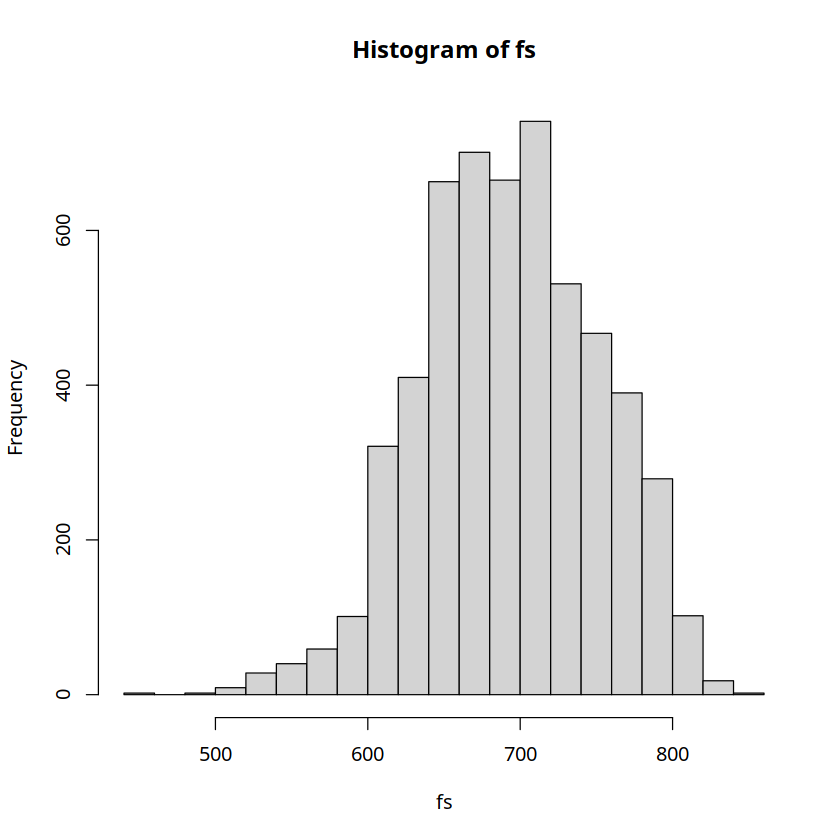

In [23]:
# 画图显示文字
par(family='STXihei')
hist(fs,nclass = 15)

In [24]:
max(fs,na.rm = T)-min(fs,na.rm = T) # 求极差

[1] 405

In [25]:
var(fs,na.rm = T) # 求方差

[1] 3345.642

In [26]:
sd(fs,na.rm = T) # 求标准差

[1] 57.84152

In [27]:
# 求平均绝对偏差
mad <- function(x){
    mean(abs(x-mean(x,na.rm = T)),na.rm = T)
}
mad(fs)

[1] 46.97402

In [28]:
str(accepts)

'data.frame':	5845 obs. of  24 variables:
 $ application_id: int  2314049 63539 7328510 8725187 4275127 8712513 2063896 598458 1526052 8073975 ...
 $ account_number: int  11613 13449 14323 15359 15812 16979 17842 19715 23924 24866 ...
 $ bad_ind       : int  1 0 1 1 0 0 0 0 1 0 ...
 $ vehicle_year  : int  1998 2000 1998 1997 2000 2000 2000 1994 1994 1999 ...
 $ vehicle_make  : chr  "FORD" "DAEWOO" "PLYMOUTH" "FORD" ...
 $ bankruptcy_ind: chr  "N" "N" "N" "N" ...
 $ tot_derog     : int  7 0 7 3 0 2 0 0 2 11 ...
 $ tot_tr        : int  9 21 10 10 10 15 13 2 13 20 ...
 $ age_oldest_tr : int  64 240 60 35 104 136 339 261 213 178 ...
 $ tot_open_tr   : int  2 11 NA 5 2 4 4 NA 3 NA ...
 $ tot_rev_tr    : int  1 7 NA 4 0 3 3 1 2 3 ...
 $ tot_rev_debt  : int  506 34605 NA 4019 0 3651 2094 146 2602 1815 ...
 $ tot_rev_line  : int  500 57241 NA 5946 1800 5747 20115 265 5529 2097 ...
 $ rev_util      : int  101 60 0 68 0 64 10 55 47 87 ...
 $ fico_score    : int  650 649 613 603 764 680 794 722 6

In [29]:
accepts$bad_ind <- as.factor(accepts$bad_ind)

In [30]:
class(accepts$bad_ind)

[1] "factor"

In [31]:
table(accepts$bad_ind)


   0    1 
4648 1197 

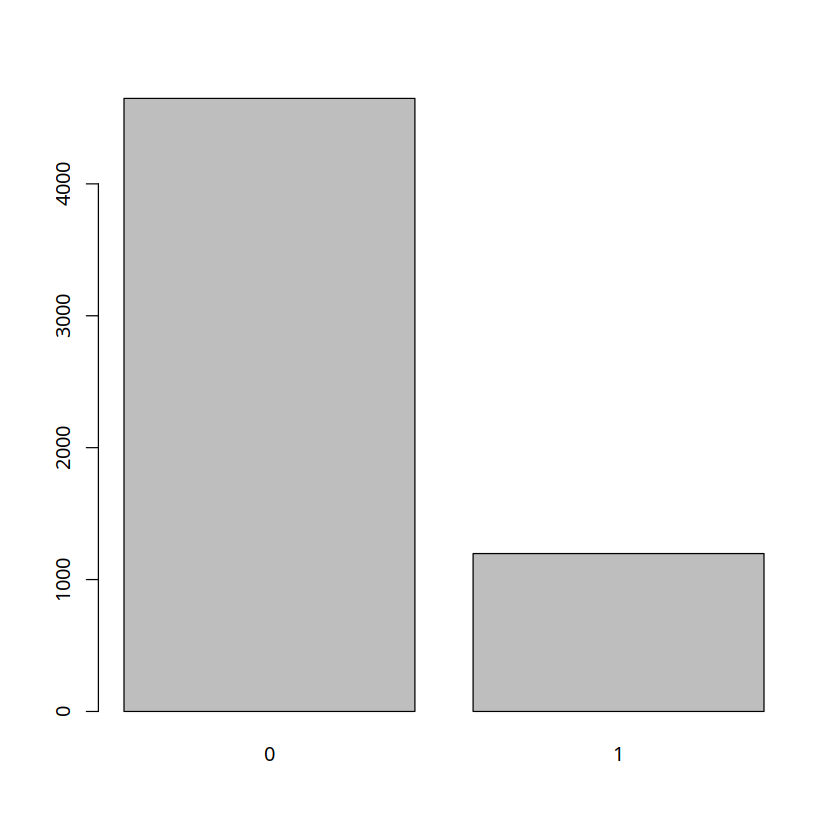

In [32]:
par(family='STXihei')
barplot(table(accepts$bad_ind))

In [35]:
library(GLDEX)
fs_s <- skewness(fs,na.rm =T) # 计算偏度

Loading required package: cluster



In [36]:
fs_s

[1] -0.1484028

In [37]:
fs_k <- kurtosis(fs,na.rm = T) # 计算峰度

In [38]:
fs_k

[1] -0.1940611

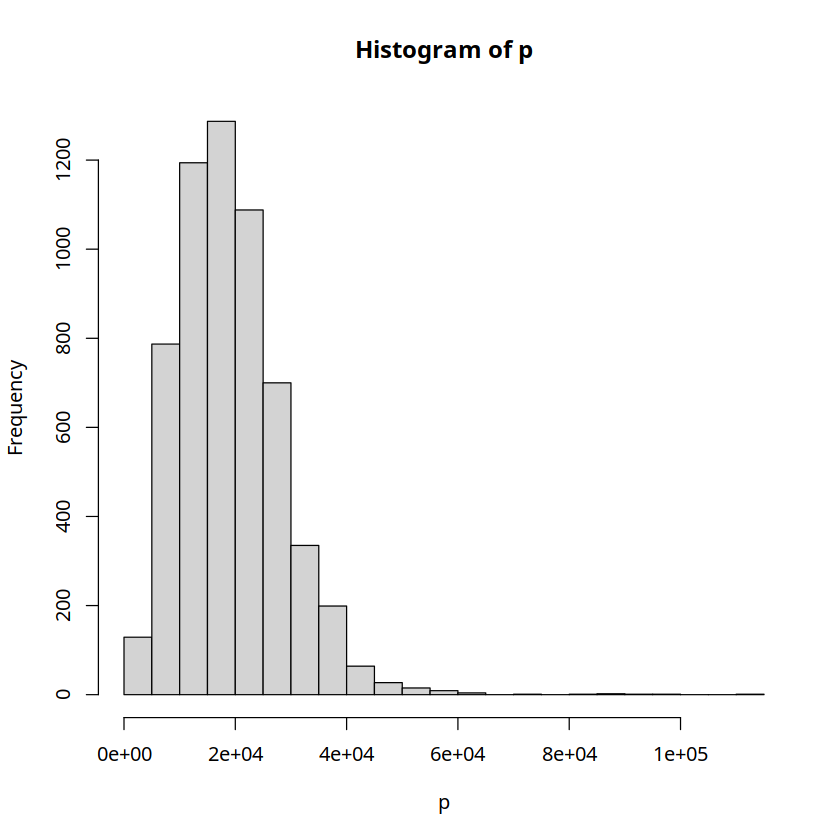

In [39]:
par(family='STXihei')
p <- accepts$purch_price
hist(p,nclass = 20)

In [40]:
p_s <- skewness(p,na.rm = T)

In [41]:
p_s

[1] 1.204128

In [42]:
p_k <- kurtosis(p,na.rm = T)

In [43]:
p_k

[1] 5.124661

In [44]:
m <- matrix(c(fs_s,fs_k,p_s,p_k),nrow = 2)
colnames(m) <- c("信用得分正态","购买价格偏右")
rownames(m) <- c("偏度","峰度")
print(m)

     信用得分正态 购买价格偏右
偏度   -0.1484028     1.204128
峰度   -0.1940611     5.124661


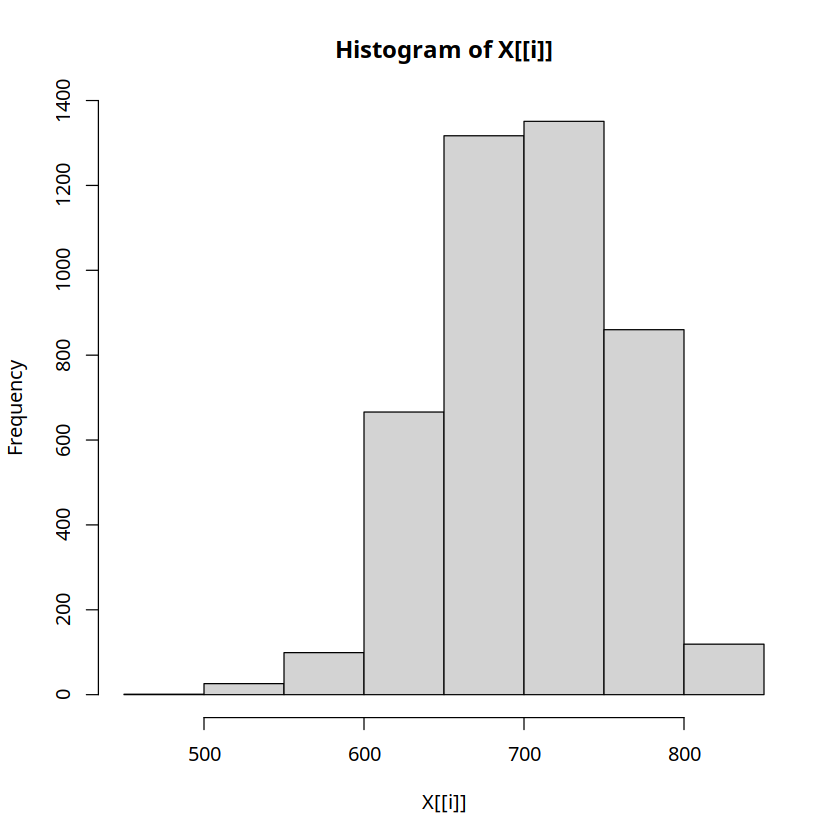

$`0`
$breaks
[1] 450 500 550 600 650 700 750 800 850

$counts
[1]    1   26   99  666 1317 1351  860  119

$density
[1] 4.505519e-06 1.171435e-04 4.460464e-04 3.000676e-03 5.933769e-03
[6] 6.086957e-03 3.874747e-03 5.361568e-04

$mids
[1] 475 525 575 625 675 725 775 825

$xname
[1] "X[[i]]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

$`1`
$breaks
 [1] 400 450 500 550 600 650 700 750 800 850

$counts
[1]   1   2  26  86 405 372 158  39   3

$density
[1] 1.831502e-05 3.663004e-05 4.761905e-04 1.575092e-03 7.417582e-03
[6] 6.813187e-03 2.893773e-03 7.142857e-04 5.494505e-05

$mids
[1] 425 475 525 575 625 675 725 775 825

$xname
[1] "X[[i]]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


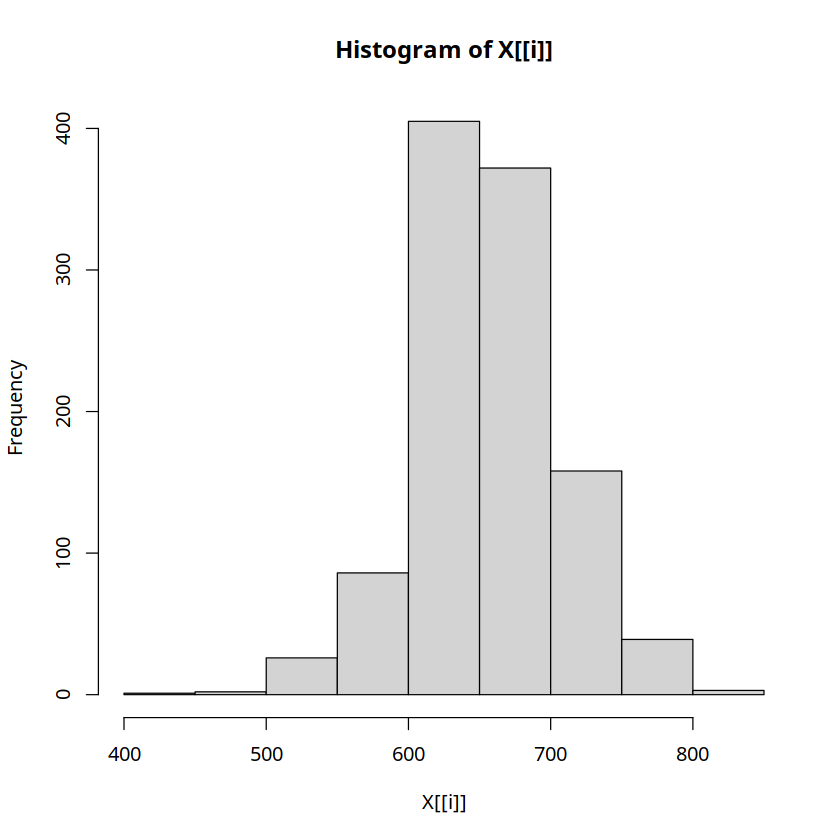

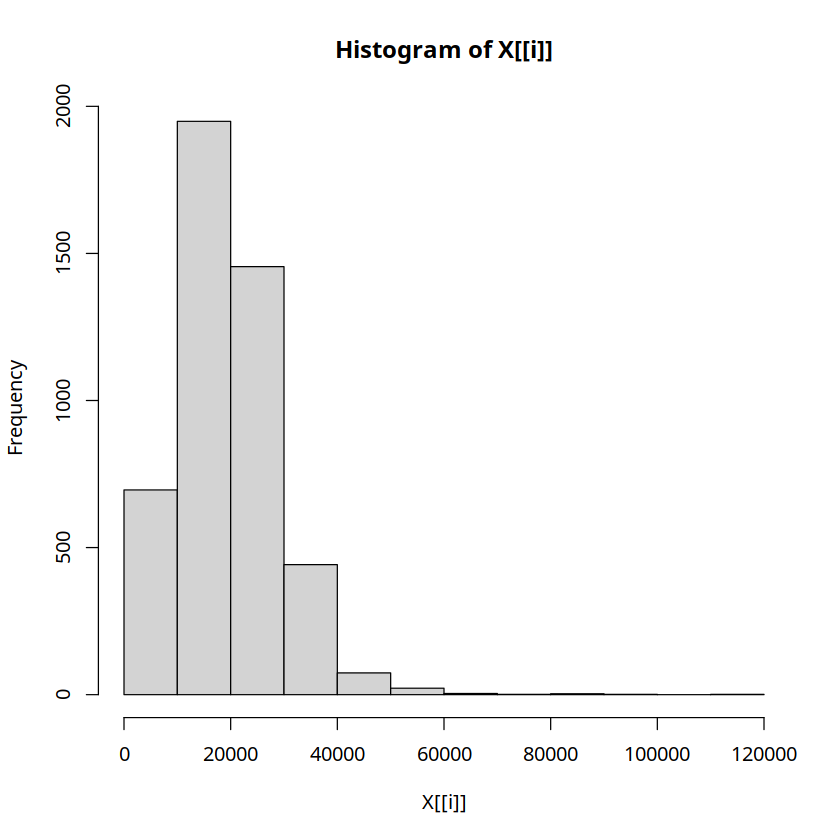

$`0`
$breaks
 [1]      0  10000  20000  30000  40000  50000  60000  70000  80000  90000
[11] 100000 110000 120000

$counts
 [1]  696 1949 1455  442   74   22    4    1    3    1    0    1

$density
 [1] 1.497418e-05 4.193201e-05 3.130379e-05 9.509466e-06 1.592083e-06
 [6] 4.733219e-07 8.605852e-08 2.151463e-08 6.454389e-08 2.151463e-08
[11] 0.000000e+00 2.151463e-08

$mids
 [1]   5000  15000  25000  35000  45000  55000  65000  75000  85000  95000
[11] 105000 115000

$xname
[1] "X[[i]]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

$`1`
$breaks
 [1] 0e+00 1e+04 2e+04 3e+04 4e+04 5e+04 6e+04 7e+04 8e+04 9e+04 1e+05

$counts
 [1] 220 532 333  92  17   2   0   0   0   1

$density
 [1] 1.837928e-05 4.444444e-05 2.781955e-05 7.685881e-06 1.420217e-06
 [6] 1.670844e-07 0.000000e+00 0.000000e+00 0.000000e+00 8.354219e-08

$mids
 [1]  5000 15000 25000 35000 45000 55000 65000 75000 85000 95000

$xname
[1] "X[[i]]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


null device 
          1

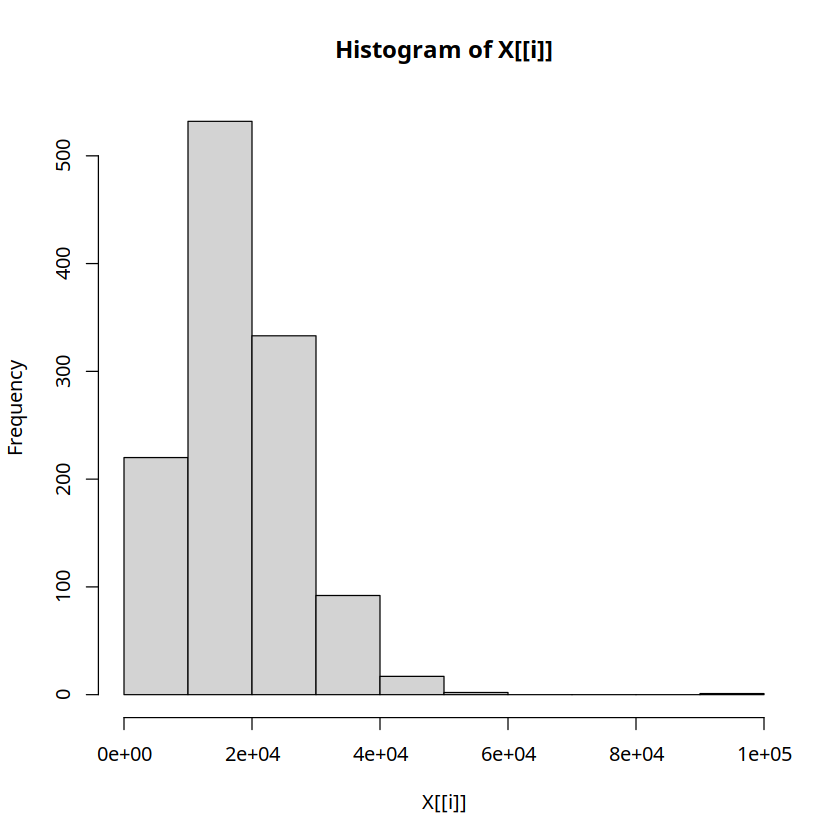

In [45]:
par(family='STXihei')
tapply(accepts$fico_score,accepts$bad_ind,hist)
tapply(accepts$purch_price,accepts$bad_ind,hist)
dev.off()

In [46]:
tapply(accepts$fico_score,accepts$bad_ind,mean,na.rm = TRUE)

0        1 
702.9556 655.2079

## 绘图

### R自带绘图

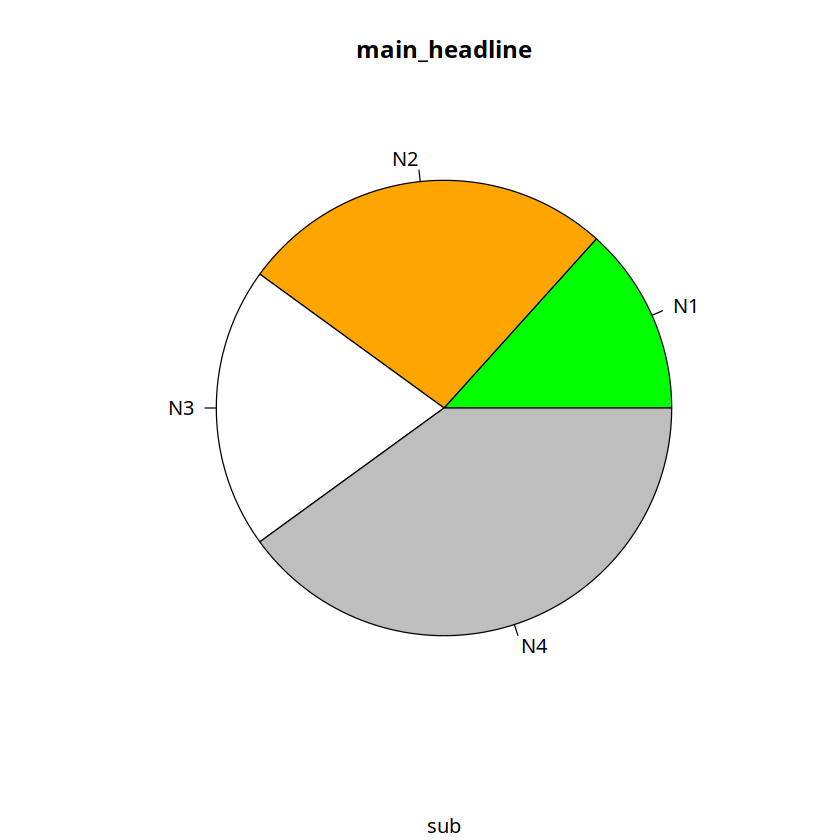

In [47]:
par(family='STXihei')
pie.sales <- c(10,20,15,30)
names(pie.sales) <- c("N1","N2","N3","N4")
pie(pie.sales,labels = names(pie.sales),col = c("green","orange","white","grey"),main = "main_headline",sub = "sub")

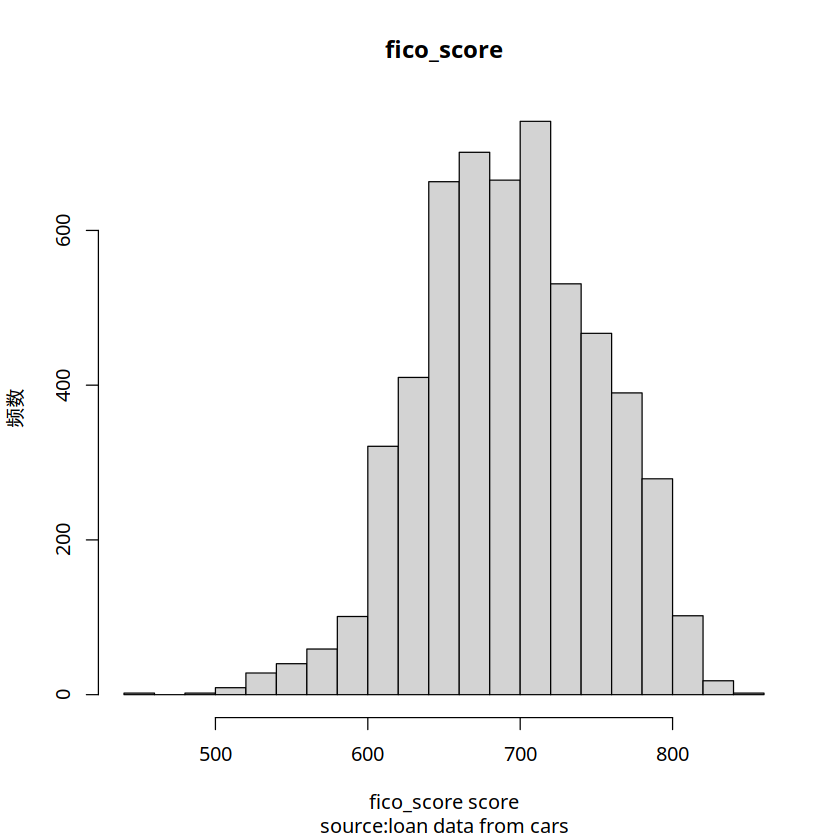

In [48]:
par(family='STXihei')
x <- accepts$fico_score
hist(x,freq = TRUE, main = "fico_score",sub = "source:loan data from cars",
    xlab = "fico_score score",ylab = "频数",nclass = 20)  # freq : TRUE 显示频数 FALSE 显示频率

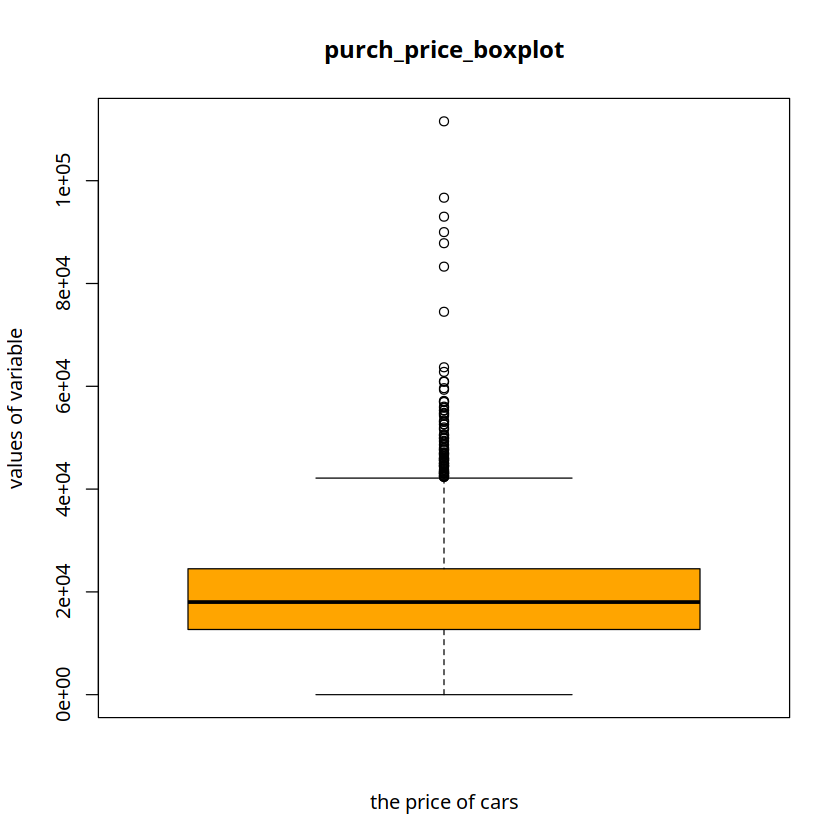

In [49]:
par(family='STXihei')
boxplot(accepts$purch_price,col = "orange", main = "purch_price_boxplot",
       xlab = "the price of cars", ylab = "values of variable", 
       outline = TRUE, width = 0.1)

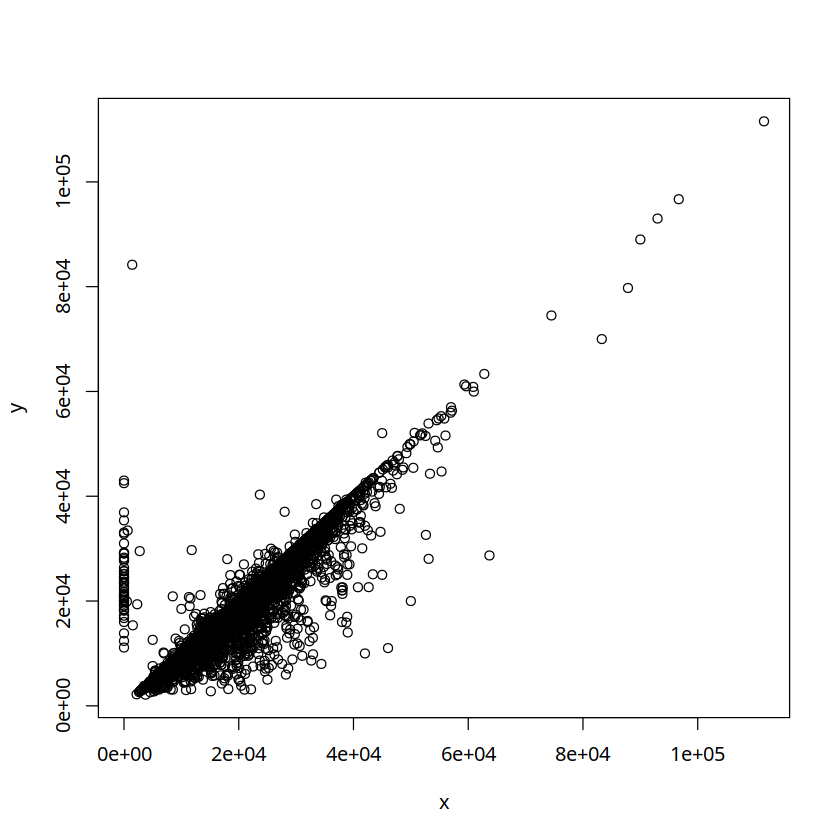

In [50]:
par(family='STXihei')
x <- accepts$purch_price
y <- accepts$loan_amt
plot(x=x,y=y,type = "p")

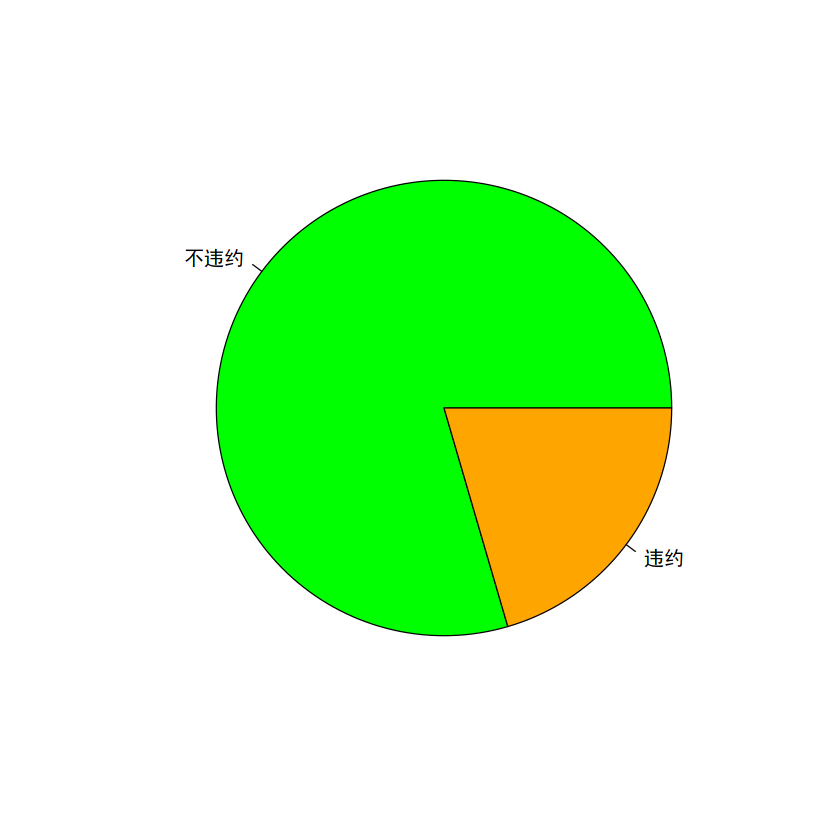

In [51]:
paint_sales <- table(accepts$bad_ind)
names(paint_sales) <- c("不违约","违约")
pie(paint_sales,labels = names(paint_sales),
   col = c("green","orange"))

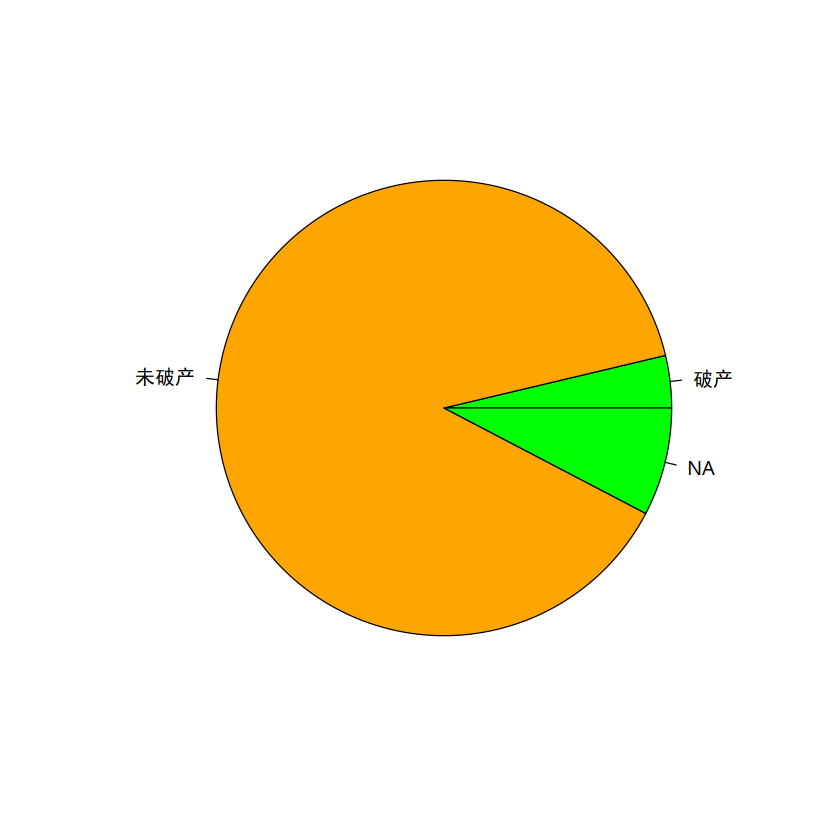

In [52]:
par(family='STXihei')
paint_sales <- table(accepts$bankruptcy_ind)
names(paint_sales) <- c("破产","未破产","NA")
pie(paint_sales,labels = names(paint_sales),
   col = c("green","orange"))

In [53]:
paint_sales

  破产 未破产     NA 
   217   5180    448 

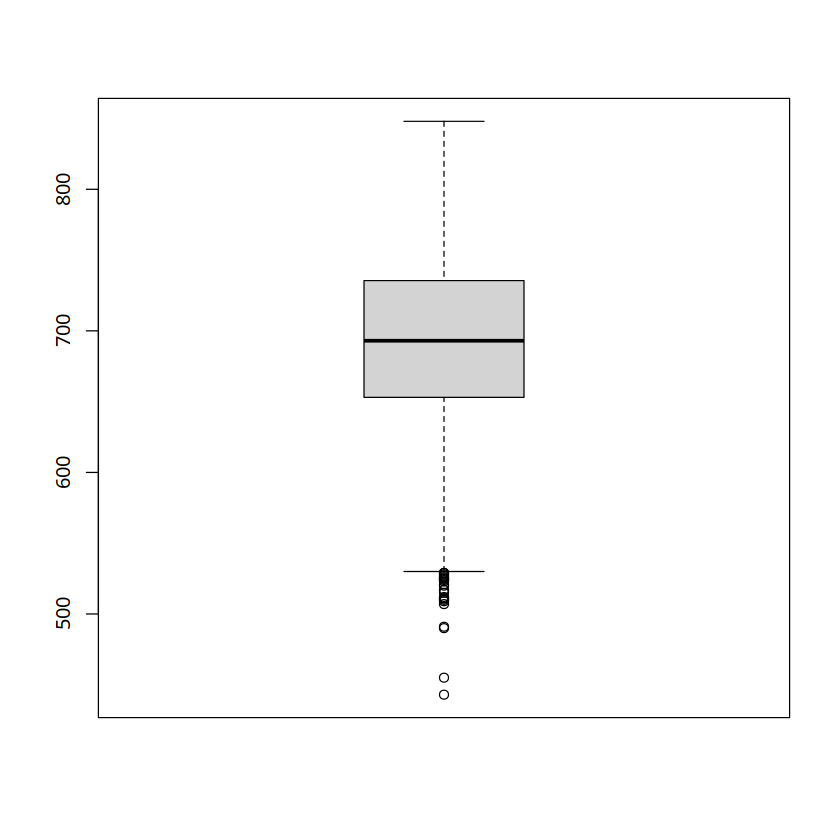

In [54]:
par(family='STXihei')
boxplot(accepts$fico_score,boxwex = 0.5)

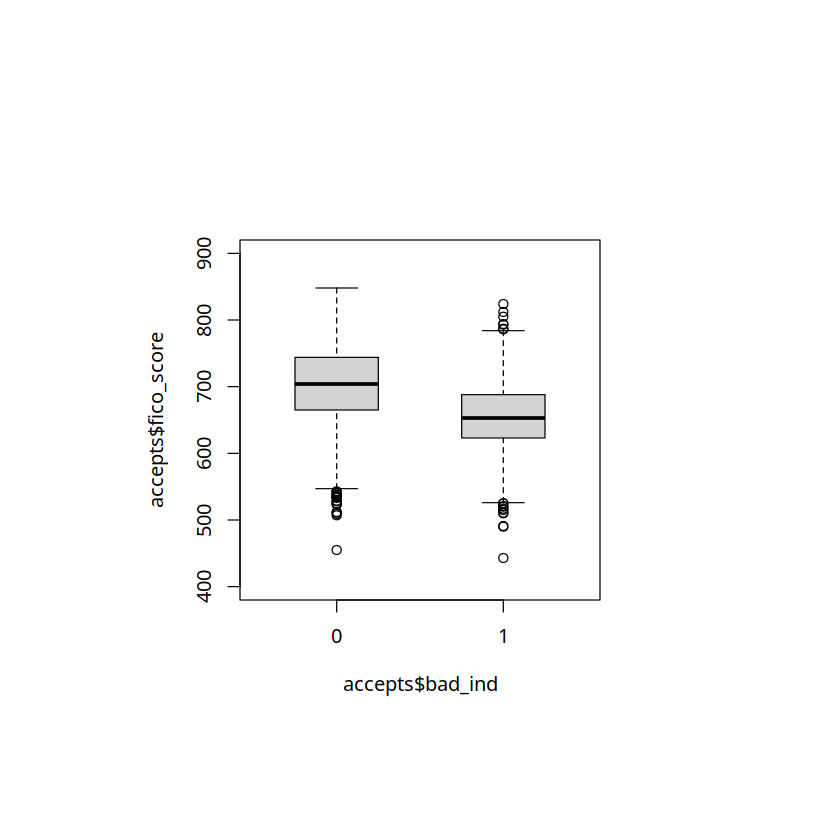

In [55]:
par(family='STXihei',pin = c(3,3))
boxplot(accepts$fico_score~accepts$bad_ind,boxwex = 0.5,at = 1:2-0.2,ylim=c(400,900))

# 课后作业

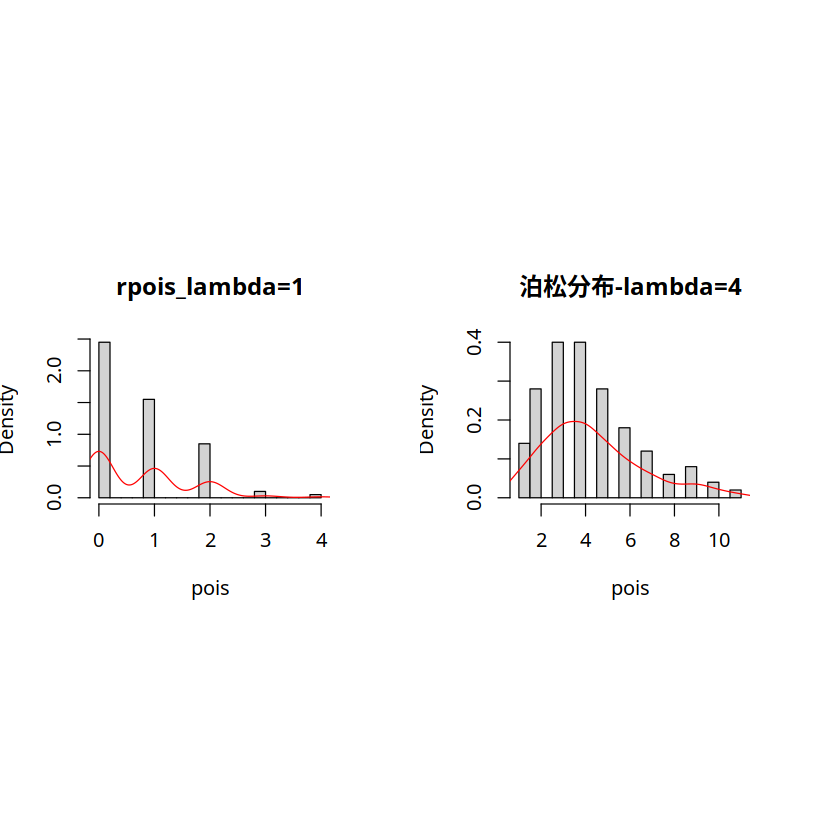

In [56]:
par(family='STXihei',mfrow=c(1,2),pin = c(2,1.4)) # par 调整图像参数  mfrow 1列2行  pin 图像大小 inch
set.seed(1234) # 保证每次运行时结果一致  1234 为标志
pois=rpois(100, lambda = 1)
hist(pois,nclass = 20,freq = FALSE, main = "rpois_lambda=1")
lines(density(pois),col = "red")

pois=rpois(100, lambda = 4)
hist(pois,nclass=20,freq=F,main='泊松分布-lambda=4')
lines(density(pois),col='red')

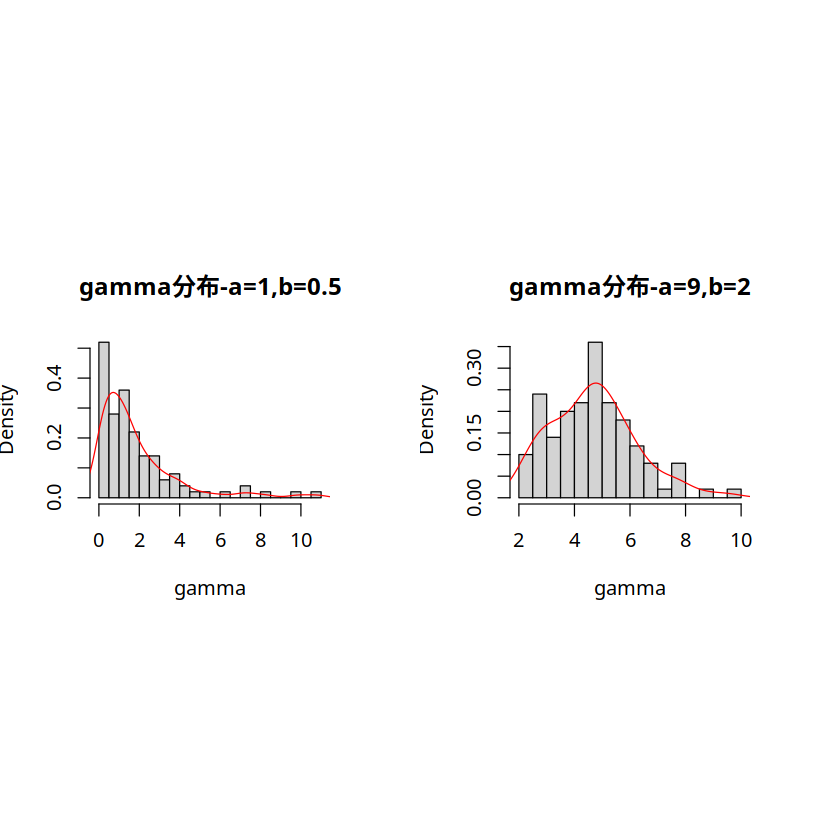

In [57]:
par(family='STXihei',mfrow=c(1,2),pin = c(2,1.4))
set.seed(1234)
gamma=rgamma(100,shape=1,rate=0.5)
hist(gamma,nclass=20,freq=F,main='gamma分布-a=1,b=0.5')
lines(density(gamma),col='red')

gamma=rgamma(100,shape=9,rate=2)
hist(gamma,nclass=20,freq=F,main='gamma分布-a=9,b=2')
lines(density(gamma),col='red')

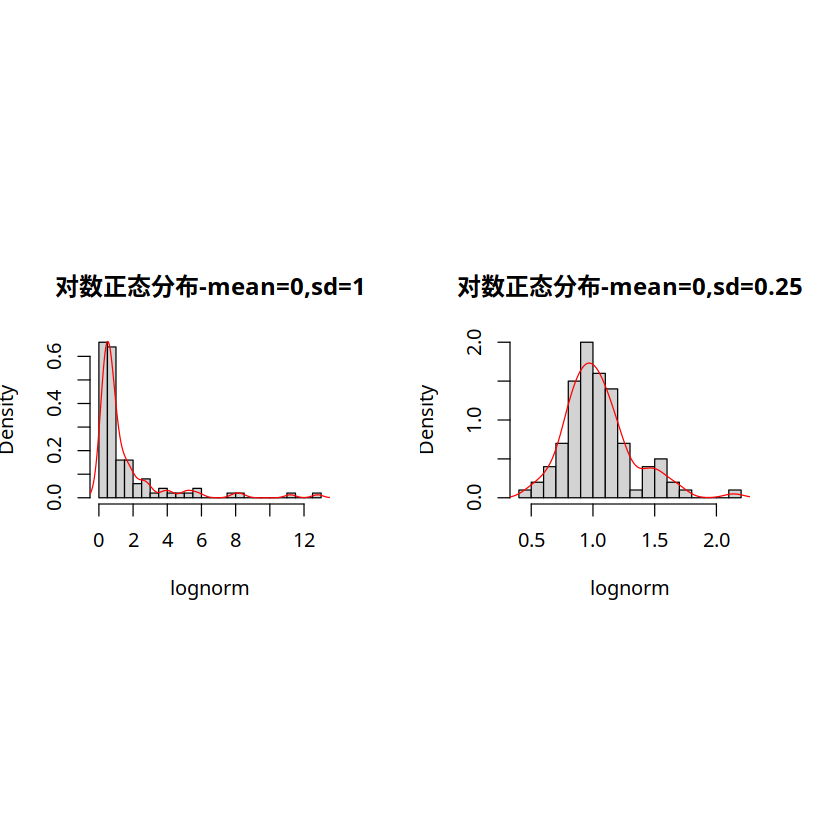

In [58]:
par(family='STXihei',mfrow=c(1,2),pin = c(2,1.4))
set.seed(1234)
lognorm=rlnorm(100,meanlog=0,sdlog=1)
hist(lognorm,nclass=20,freq=F,
     main='对数正态分布-mean=0,sd=1')
lines(density(lognorm),col='red')

lognorm=rlnorm(100,meanlog=0,sdlog=0.25)
hist(lognorm,nclass=20,freq=F,
     main='对数正态分布-mean=0,sd=0.25')
lines(density(lognorm),col='red')

In [59]:
bank_ruptcy <- table(accepts$bankruptcy_ind)
names(bank_ruptcy) <- c("NA","N","Y")
bank_ruptcy

  NA    N    Y 
 217 5180  448 

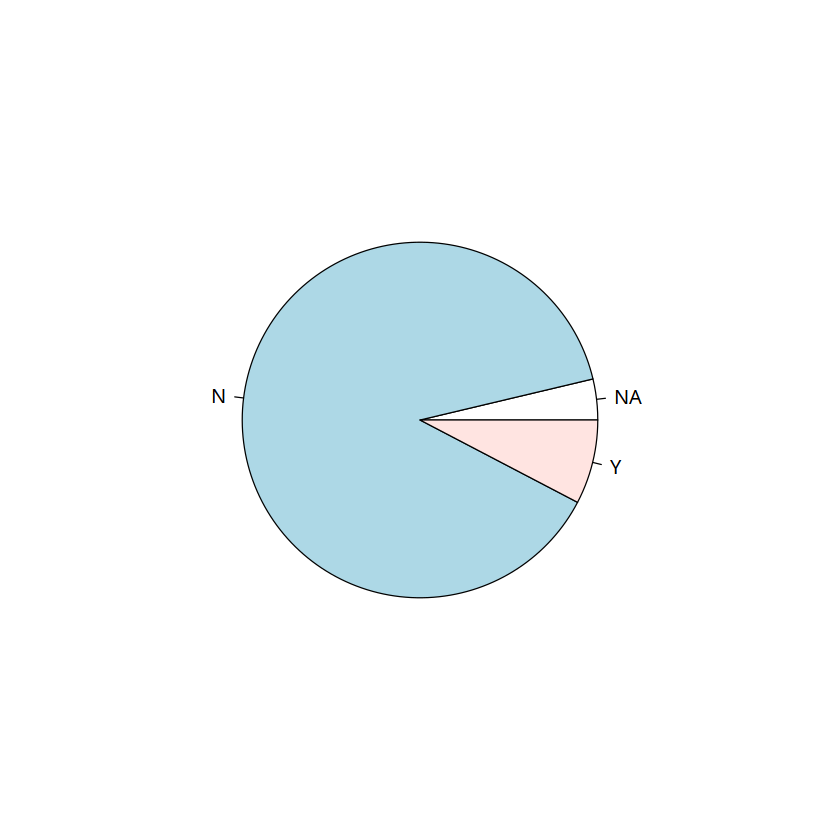

In [60]:
par(family='STXihei',pin = c(4,4))
pie(bank_ruptcy,labels = names(bank_ruptcy))